In [43]:
# скачиваем нужный датасет
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/walmart-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vasol\.cache\kagglehub\datasets\yasserh\walmart-dataset\versions\1


In [44]:
# Проверяем куда скачались данные
import os

path = r"C:/Users/vasol/.cache/kagglehub/datasets/yasserh/walmart-dataset/versions/1"

files = os.listdir(path)

files

['Walmart.csv']

In [45]:
# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# считываем данные из скаченного
df = pd.read_csv(f"c:/Users/vasol/.cache/kagglehub/datasets/yasserh/walmart-dataset/versions/1/Walmart.csv")

In [31]:
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Lag_4
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,NaN
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,NaN
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,NaN
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,NaN
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,1643690.90
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,1641957.44
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,1611968.17
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,1409727.59
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,1554806.68
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,1439541.59


In [32]:
df.shape

(6435, 9)

In [48]:
# Проверяем типы данных и пропуски в данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [34]:
# Анализируем основные метрики
df.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Lag_4
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6.255000e+03
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,1.047619e+06
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,2.099862e+05
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,5.538695e+05
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,9.604761e+05
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,1.421209e+06
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,3.818686e+06
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,5.654362e+05


In [49]:
# Меняем тип данных для правильности 
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

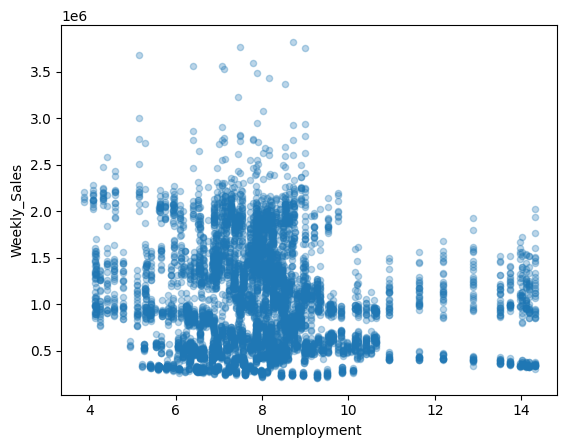

In [36]:
# Магазины с высокими продажами расположены в регионах с низкой безработицей
df.plot.scatter(x='Unemployment', y='Weekly_Sales', alpha=0.3)
plt.show()

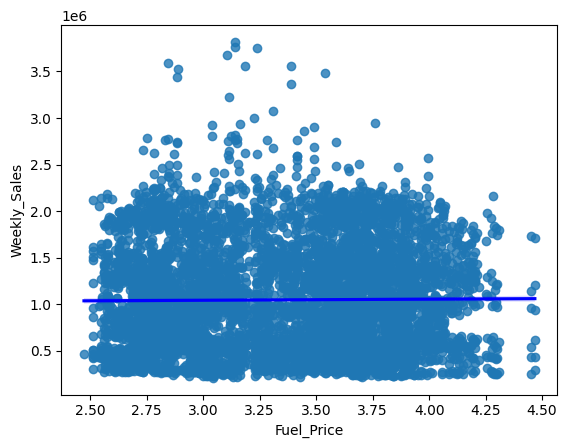

In [37]:
# Цена на топливо влияет на продажи
sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, line_kws={'color': 'blue'})
plt.show()

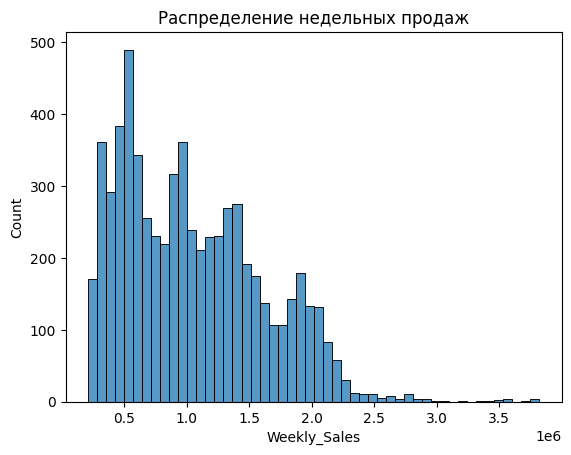

In [38]:
# Распределение продаж
sns.histplot(df['Weekly_Sales'], bins=50)
plt.title('Распределение недельных продаж')
plt.show()

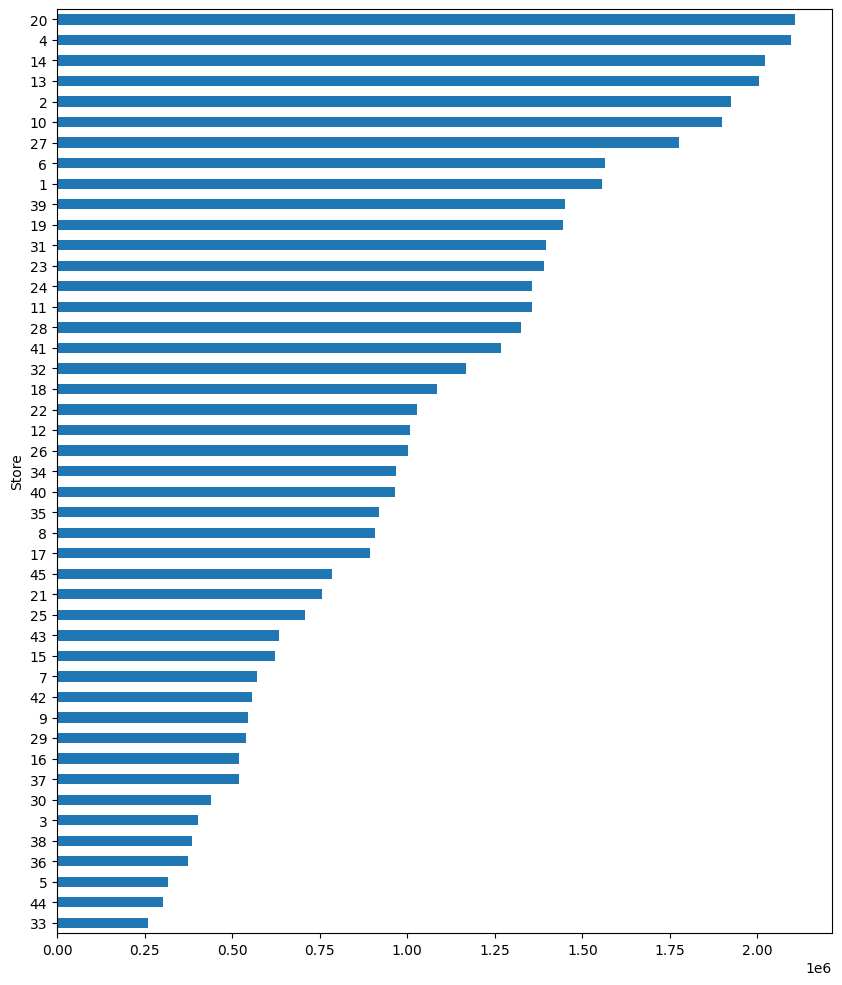

In [39]:
# Анализ по магазинам
df.groupby('Store')['Weekly_Sales'].mean().sort_values().plot(kind='barh', figsize=(10, 12))
plt.show()

In [40]:
# продажи 4 недели назад
df['Sales_Lag_4'] = df.groupby('Store')['Weekly_Sales'].shift(4)